# Project: Investigate TMDB Movies Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
In this project, I will be analyzing TMDB Movies dataset. 
<br> After looking at the data set breifly in a spreadsheet, following questions came to my mind.
<br> I will analyse the dataset and provisionally answer the below questions
<br>
<br> 1. Does the budget of the movie determine its success (revenue collected)?
<br> 2. Was there a raise in popularity of the movies over the years? Did this raise help increase in revenues?
<br> 3. When is the best time to release a movie?
<br> 4. Which director should a production house approach to earn more revenues?
<br> 5. Are movies of certain genre popular during certain months?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling
In this phase, I'll inspect the dataset to find if it has common data problems such as duplicates, missing values or mismatched datatypes. 
<br> I'll cleanup the data based on the problems I encounter. 

In [2]:
# loading csv file to pandas dataframe and profiling sample data

df_TMDB = pd.read_csv('tmdb-movies.csv')
df_TMDB.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.1,2015,137999939.3,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/2015,2480,6.3,2015,101199955.5,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/2015,5292,7.5,2015,183999919.0,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/2015,2947,7.3,2015,174799923.1,1.385749e+09


In [3]:
# Find total number of rows and columns in the dataset to get a sense of how much data I'm working with

df_TMDB.shape

(10866, 21)

In [4]:
# finding the column labels in the dataframes and datatypes associated with each column
# This is done to ensure the labels are lower case and dont have spaces in them
# I also want to check the datatypes of various columns

df_TMDB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [5]:
# Some of the columns I want to use in my analysis are of Object datatype
# So I'm findsing all the columns with object as datatype

df_TMDB.select_dtypes(include='object').columns

Index(['imdb_id', 'original_title', 'cast', 'homepage', 'director', 'tagline',
       'keywords', 'overview', 'genres', 'production_companies',
       'release_date'],
      dtype='object')

In [6]:
# verifying actual datatype of the columns with datatype listed as object in dataframe
# Notice release_date is stored as string which can be modified to datetime so that month and other date parts can be extracted easily

type(df_TMDB['imdb_id'][10]),type(df_TMDB['original_title'][10]),type(df_TMDB['cast'][10]),type(df_TMDB['director'][10]), type(df_TMDB['genres'][10]),type(df_TMDB['production_companies'][10]),type(df_TMDB['release_date'][10])

(str, str, str, str, str, str, str)

In [7]:
# I want to use cast and genre columns in my analysis
# So I'm finding the number of unique values in each column
# Although cast shows 10719 unique values, splitting the column further would provide details of individual cast

df_TMDB.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

In [8]:
# number of duplicates in the dataset

sum(df_TMDB.duplicated())

1

In [9]:
# revenue is an important metric/variable in this dataset which will measure the success of a film
# Hence I will omit movies with revenue equal to zero and want to find how many in this dataset fall under this case

df_TMDB.query('revenue == 0').count()

id                      6016
imdb_id                 6006
popularity              6016
budget                  6016
revenue                 6016
original_title          6016
cast                    5945
homepage                1271
director                5973
tagline                 3656
keywords                4758
overview                6012
runtime                 6016
genres                  5993
production_companies    5082
release_date            6016
vote_count              6016
vote_average            6016
release_year            6016
budget_adj              6016
revenue_adj             6016
dtype: int64

In [10]:
# Likewise I want to omit any revenue with null values. Find sum of null values for revenue column.

df_TMDB.revenue.isnull().sum()

0

In [11]:
# Approximate number of records that I'm going to analyze. Record count where revenue is gretaer than zero.

df_TMDB.query('revenue > 0').count()

id                      4850
imdb_id                 4850
popularity              4850
budget                  4850
revenue                 4850
original_title          4850
cast                    4845
homepage                1665
director                4849
tagline                 4386
keywords                4615
overview                4850
runtime                 4850
genres                  4850
production_companies    4754
release_date            4850
vote_count              4850
vote_average            4850
release_year            4850
budget_adj              4850
revenue_adj             4850
dtype: int64

### Data Cleaning
The column labels in this dataset looks clean so no change in them.
<br> There is one record which is duplicated which I will drop
<br> There are about 6016 records with zero revenues. I deem them unhelful for this analysis and will be dropping them.
<br> There are columns like homepage, tagline, keywords, overview which I dont intend to use and will be dropping them.

In [12]:
# Drop duplicates from the dataset

df_TMDB.drop_duplicates(inplace=True)

In [13]:
# number of duplicates in the dataset

sum(df_TMDB.duplicated())

0

In [14]:
# Data with 'revenue > 0' loaded to new dataframe

df_TMDB = df_TMDB.query('revenue > 0')
df_TMDB.shape

(4849, 21)

In [15]:
# Dropping the unnecessary columns for this analysis

col = ['imdb_id', 'homepage', 'tagline', 'keywords']

df_TMDB.drop(col, axis=1, inplace=True)

In [16]:
# Verify the columns are dropped from dataframe

df_TMDB.shape

(4849, 17)

In [17]:
df_TMDB['release_date']= pd.to_datetime(df_TMDB['release_date'])

In [18]:
type(df_TMDB['release_date'][20])

pandas._libs.tslibs.timestamps.Timestamp

In [19]:
# Saving the cleansed dataframe to a new CSV so that we can work with just that dataset

df_TMDB.to_csv('tmdb_cleaned.csv', index=False)

In [20]:
# verifying file saved without index column
df=pd.read_csv('tmdb_cleaned.csv')
df.head()

,id,popularity,budget,revenue,original_title,cast,director,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,137999939.3,1.392446e+09
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,137999939.3,3.481613e+08
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,101199955.5,2.716190e+08
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,183999919.0,1.902723e+09
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,174799923.1,1.385749e+09


In [21]:
# verifying all cleaned data from file got saved. We need to get 4849 rows and 17 columns.

df.shape

(4849, 17)

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1:
### Does the budget of the movie determine its success (revenue made)?

In [22]:
# With the cleansed dataset, I would like to see revenue plotted against budget to find the correlation
# Since we have adjusted budget and revenue columns, I think they are better suited for finding the correlation

df.describe()

# From the mean and percentile values I can see that revenues increase with the budget
# I can also see there is a data problem with Budget and adjusted Budget values. They have zeros in them although revenues were reported.

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,4849.000000,4849.000000,4.849000e+03,4.849000e+03,4849.000000,4849.000000,4849.000000,4849.000000,4.849000e+03,4.849000e+03
mean,44575.491648,1.045202,2.956961e+07,8.923886e+07,107.968035,436.283151,6.149000,2000.919777,3.516208e+07,1.151009e+08
std,72368.860461,1.356752,4.051761e+07,1.620801e+08,21.113779,806.485754,0.798707,11.569650,4.376117e+07,1.988557e+08
min,5.000000,0.001117,0.000000e+00,2.000000e+00,15.000000,10.000000,2.100000,1960.000000,0.000000e+00,2.370705e+00
25%,8285.000000,0.387740,1.700000e+06,7.732325e+06,95.000000,46.000000,5.600000,1994.000000,2.329409e+06,1.046585e+07
50%,12154.000000,0.680581,1.500000e+07,3.185308e+07,104.000000,147.000000,6.200000,2004.000000,2.032801e+07,4.395666e+07
75%,43959.000000,1.210502,4.000000e+07,9.996575e+07,117.000000,435.000000,6.700000,2010.000000,4.973516e+07,1.316482e+08
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,705.000000,9767.000000,8.400000,2015.000000,4.250000e+08,2.827124e+09


In [23]:
# There are quite a few movies with 10 million or more revenue reported. 
# Hence I plan to replace 0 values of budget with their corresponding revenues.
# Budget = Revenue means there is no profit or loss for the associated movie.
# This will help in answering another research question cast/director correlation on revenue

df_r = df.query("budget == 0 & revenue > 10000000")

df_r.shape

(413, 17)

In [24]:
# Replacing budget 0 values with nan

df.budget.replace(0, np.nan)

0       150000000.0
1       150000000.0
2       110000000.0
3       200000000.0
4       190000000.0
5       135000000.0
6       155000000.0
7       108000000.0
8        74000000.0
9       175000000.0
10      245000000.0
11      176000003.0
12       15000000.0
13       88000000.0
14      280000000.0
15       44000000.0
16       48000000.0
17      130000000.0
18       95000000.0
19      160000000.0
20      190000000.0
21       30000000.0
22      110000000.0
23       40000000.0
24       28000000.0
25      150000000.0
26       68000000.0
27       81000000.0
28       20000000.0
29       61000000.0
           ...     
4819            NaN
4820      6000000.0
4821     20000000.0
4822       650000.0
4823     55000000.0
4824       300000.0
4825      2700000.0
4826            NaN
4827     15000000.0
4828            NaN
4829            NaN
4830      2300000.0
4831      4000000.0
4832      7920000.0
4833           11.0
4834      5000000.0
4835     12000000.0
4836      3500000.0
4837            NaN


In [25]:
# Replacing budget_adj 0 values with nan

df.budget_adj.replace(0, np.nan)

0       1.379999e+08
1       1.379999e+08
2       1.012000e+08
3       1.839999e+08
4       1.747999e+08
5       1.241999e+08
6       1.425999e+08
7       9.935996e+07
8       6.807997e+07
9       1.609999e+08
10      2.253999e+08
11      1.619199e+08
12      1.379999e+07
13      8.095996e+07
14      2.575999e+08
15      4.047998e+07
16      4.415998e+07
17      1.195999e+08
18      8.739996e+07
19      1.471999e+08
20      1.747999e+08
21      2.759999e+07
22      1.012000e+08
23      3.679998e+07
24      2.575999e+07
25      1.379999e+08
26      6.255997e+07
27      7.451997e+07
28      1.839999e+07
29      5.611998e+07
            ...     
4819             NaN
4820    2.005620e+07
4821    6.685401e+07
4822    2.172755e+06
4823    1.838485e+08
4824    1.002810e+06
4825    9.025292e+06
4826             NaN
4827    5.014051e+07
4828             NaN
4829             NaN
4830    7.688212e+06
4831    1.337080e+07
4832    2.647419e+07
4833    3.676971e+01
4834    1.671350e+07
4835    4.011

In [26]:
# Filling nan with revenue values

df['budget'].fillna(value=df['revenue'],inplace=True)

In [27]:
df['budget_adj'].fillna(value=df['revenue_adj'],inplace=True)

In [28]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,4849.000000,4849.000000,4.849000e+03,4.849000e+03,4849.000000,4849.000000,4849.000000,4849.000000,4.849000e+03,4.849000e+03
mean,44575.491648,1.045202,2.956961e+07,8.923886e+07,107.968035,436.283151,6.149000,2000.919777,3.516208e+07,1.151009e+08
std,72368.860461,1.356752,4.051761e+07,1.620801e+08,21.113779,806.485754,0.798707,11.569650,4.376117e+07,1.988557e+08
min,5.000000,0.001117,0.000000e+00,2.000000e+00,15.000000,10.000000,2.100000,1960.000000,0.000000e+00,2.370705e+00
25%,8285.000000,0.387740,1.700000e+06,7.732325e+06,95.000000,46.000000,5.600000,1994.000000,2.329409e+06,1.046585e+07
50%,12154.000000,0.680581,1.500000e+07,3.185308e+07,104.000000,147.000000,6.200000,2004.000000,2.032801e+07,4.395666e+07
75%,43959.000000,1.210502,4.000000e+07,9.996575e+07,117.000000,435.000000,6.700000,2010.000000,4.973516e+07,1.316482e+08
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,705.000000,9767.000000,8.400000,2015.000000,4.250000e+08,2.827124e+09


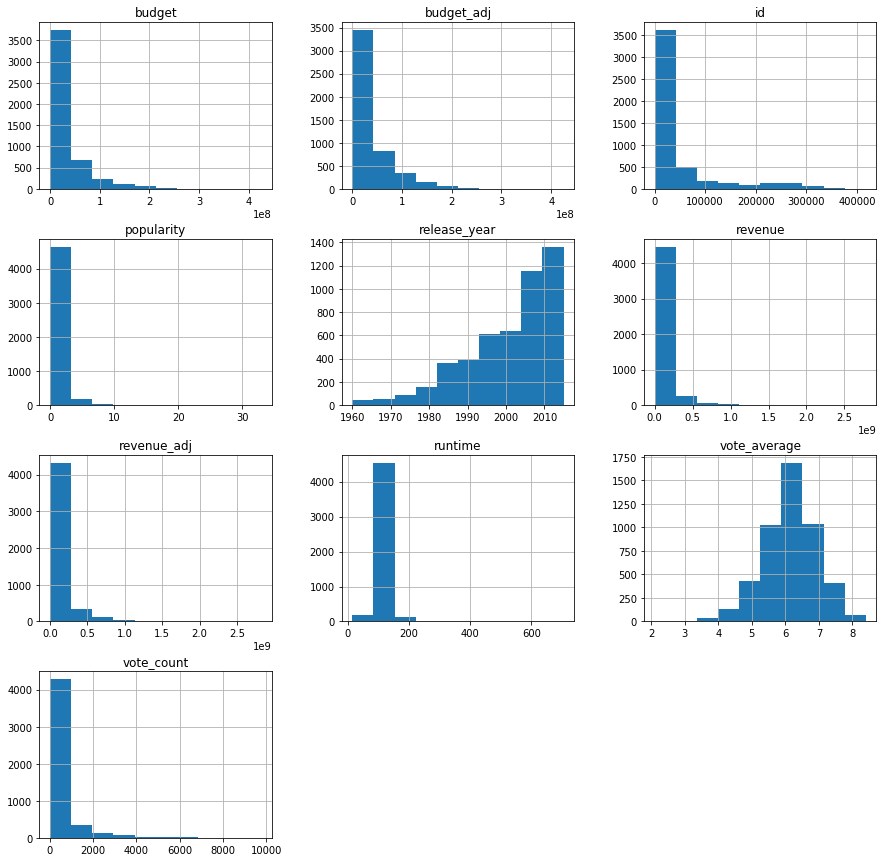

In [29]:
df.hist(figsize = (15,15));

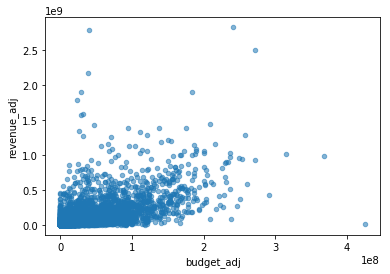

In [30]:
# Revenue and budget are both skewed to right
# I will check their correlation using a scatter plot to answer the first question.
# Due to outliers and too many overlaid data points correlation between budget and revenue isnt very clear.

df.plot(x="budget_adj", y="revenue_adj", kind="scatter", alpha = 0.55);

C:\Users\vijay\Anaconda3\lib\site-packages\pandas\core\generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


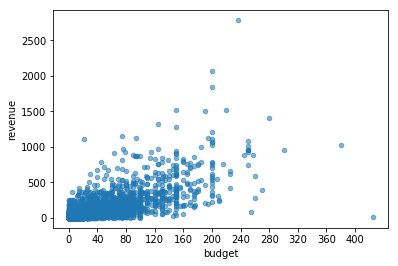

In [31]:
# Lets use subset of recent year movies and plot the graph again to take a look at recent years relationship.
# Even with this subset, the correlation isnt much clear as to whether budget and revenue are correlated.

df_r = df.query("release_year>1990")

df_r.revenue = np.divide(df_r.revenue,1000000)
df_r.budget = np.divide(df_r.budget,1000000)

df_r.plot(figsize=(6,4),x="budget", y="revenue", kind="scatter", xticks = range(0,440,40), yticks = range(0,3000,500), alpha = 0.55);

In [32]:
# Thanks to the reviewer1 on helping me with this corr() function
# Lets take a look at the correlation using corr() function to determine the correlation independently
# This quantitatvely shows budget and revenue are positively correlated.

df['budget_adj'].corr(df.revenue_adj), df_r['budget_adj'].corr(df_r.revenue_adj)

(0.5932795800404377, 0.6888159173013563)

In [33]:
# Create bins to see if low budget movies made lower revenues and high budget movies made higher revenues

bin_edges = [ 0, 2329409,20328010 ,49735160, 425000000]

bin_names = ['low' , 'medium' , 'high' , 'ultra-high' ] 

df['Budget_Levels'] = pd.cut(df['budget_adj'], bin_edges, labels=bin_names)

# verify creation of Budget_Levels column

df.head()

,id,popularity,budget,revenue,original_title,cast,director,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,Budget_Levels
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,137999939.3,1.392446e+09,ultra-high
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,137999939.3,3.481613e+08,ultra-high
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,101199955.5,2.716190e+08,ultra-high
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,183999919.0,1.902723e+09,ultra-high
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,174799923.1,1.385749e+09,ultra-high


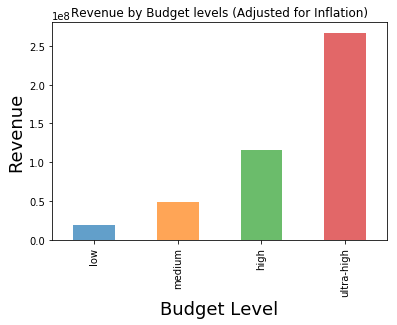

In [34]:
# From the chart below it is obvious that when budget is low, revenue is low and when it is high, revenues are high.

df.groupby('Budget_Levels')['revenue_adj'].mean().plot(kind = 'Bar',title = 'Revenue by Budget levels (Adjusted for Inflation)', alpha = .7);

plt.xlabel('Budget Level', fontsize = 18);

plt.ylabel('Revenue', fontsize = 18);


### Research Question 2:
### Was there a raise in popularity of the movies over the years? Did this raise tie in with increase in revenues?

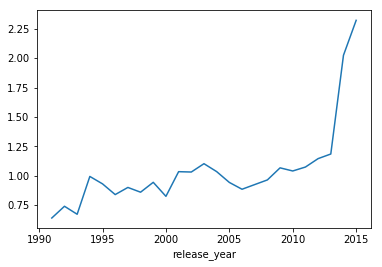

In [35]:
# From the hist plots above, we can see release year is skewed to left. A lot of movies were released after late 1990's. 

# People must have been interested in movies which is why lot of movies must have been made.
# Likewise production houses must have made larger profits due to this increased # of movies.

# A popularity trend will show if people were interested in recent year movies.

df_r.groupby('release_year').mean().popularity.plot(kind="line");


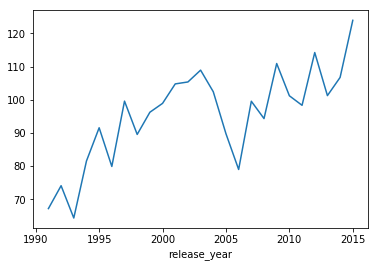

In [36]:
# A revenue trend will show if production houses got more revenue over the years.

df_r.groupby('release_year').mean().revenue.plot(kind="line");

In [37]:
# plotting above trends together will help understand their relationship much better 
    
df_rev_pop = df_r.groupby('release_year')['revenue','popularity'].mean().reset_index()

In [38]:
# Since popularity numbers are small, plotting both the measures on same plot will flatten popularity line
# Hence Scaling up the popularity column to show the trend of revenue and popularity

df_rev_pop.popularity = np.multiply(df_rev_pop.popularity,50)

In [39]:
df_rev_pop.head(25)

,release_year,revenue,popularity
0,1991,67.237140,32.033237
1,1992,74.123820,37.023026
2,1993,64.399548,33.631414
3,1994,81.556657,49.701820
4,1995,91.563412,46.546191
5,1996,79.918195,41.990349
6,1997,99.581058,45.026937
7,1998,89.558254,43.004441
8,1999,96.234852,47.206114
9,2000,98.907216,41.248121


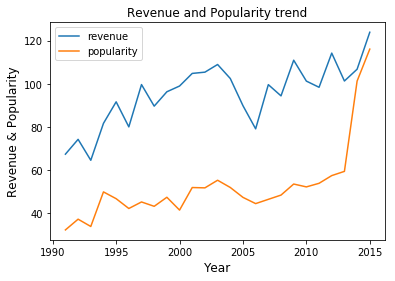

In [40]:
df_rev_pop.plot(x="release_year", y=["revenue","popularity"] , kind="line",rot = 0, title = 'Revenue and Popularity trend');

plt.xlabel('Year', fontsize = 12);

plt.ylabel('Revenue & Popularity', fontsize = 12);


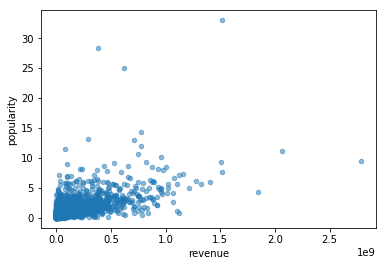

In [41]:
# Lets check the correlation between popularity and revenue using scatter plot

df.plot(x="revenue", y="popularity", kind="scatter",alpha = .5);

In [42]:
# Let us independently verify if a correlation exists between Popularity and Revenue
# There is a positive correlation between popularity and revenue

df['popularity'].corr(df.revenue)

0.6293048642415201

### Research Question 3:
### When is the best time to release a movie?

In [43]:
# Although we saved release_ date as datetime, it is getting stored as string/object. Converting again to datetime.
df['release_date']= pd.to_datetime(df['release_date'])

In [44]:
# Extract Month from release_date

df['Month'] = df['release_date'].dt.month

In [45]:
df.head()

,id,popularity,budget,revenue,original_title,cast,director,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,Budget_Levels,Month
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,137999939.3,1.392446e+09,ultra-high,6
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,137999939.3,3.481613e+08,ultra-high,5
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,101199955.5,2.716190e+08,ultra-high,3
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,183999919.0,1.902723e+09,ultra-high,12
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,174799923.1,1.385749e+09,ultra-high,4


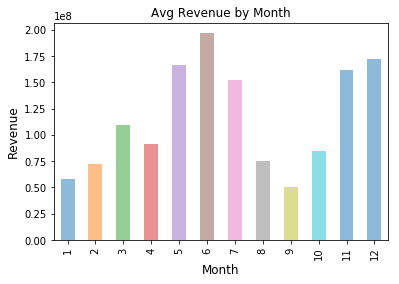

In [46]:
# From the plot it can be observed summer and Holidays are the best time to release a movie to get larger revenue.
# Movies released in the dump months (Jan, Feb, Aug, Sep) dont seem to have fared well
# https://en.wikipedia.org/wiki/Dump_months

df.groupby('Month').mean().revenue_adj.plot(kind = "bar", title = 'Avg Revenue by Month', alpha = .5);

plt.xlabel('Month', fontsize = 12);

plt.ylabel('Revenue', fontsize = 12);


### Research Question 4:
### Which director should a production house approach to earn more revenues? 

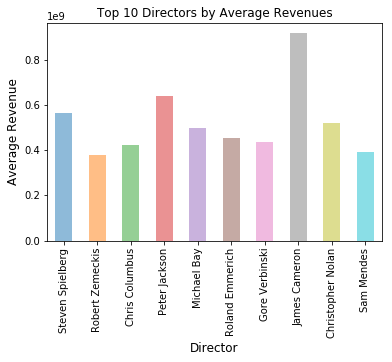

In [47]:
# https://stackoverflow.com/questions/38126375/pandas-how-to-sort-a-grouped-dataframe-by-mean-amount
# https://stackoverflow.com/questions/10373660/converting-a-pandas-groupby-output-from-series-to-dataframe

# Grouping and sorting the dataframe to retrieve directors who made more than 1 movie collected more revenue on an average
df_d = df.groupby('director')['revenue_adj'].agg(['mean', 'count'])
df_d = df_d.sort_values(by=['count','mean'],ascending=False).head(100)

# Sort and retrieve top 10 directors by their average revenues
df_d = df_d.sort_values(by=['mean'],ascending=False).head(10).reset_index()

# Sort by number of movies made
df_d = df_d.sort_values(by=['count'],ascending=False).head(10)

# Plot top 10 directors to show their historical avg revenues vs the # of movies made
# df_d.plot(x="director", y="count", alpha = .5 , kind="line" , legend = None);
# plt.xlabel('Director', fontsize = 12);
# plt.ylabel('# of Movies', fontsize = 12);

df_d.plot(x="director", y="mean", alpha = .5 , kind="Bar", legend = None , title = 'Top 10 Directors by Average Revenues');

plt.xlabel('Director', fontsize = 12);

plt.ylabel('Average Revenue', fontsize = 12);


### Research Question 5:
### Are movies of certain genre popular during certain months?

In [48]:
dfx = df[df['genres'].str.contains('|')]

In [49]:
#https://medium.com/@sureshssarda/pandas-splitting-exploding-a-column-into-multiple-rows-b1b1d59ea12e

df1 = pd.DataFrame(dfx.genres.str.split('|').tolist(), index=df.id).stack()
df1 = df1.reset_index([0, 'id'])
df1.columns = ['join_id', 'genres']

In [50]:
# Create a df with only the required columns

df_m = dfx[['id','Month','popularity']]

In [51]:
# Merge the dataframe to get stack of genres by month

df_combined = df_m.merge(df1, left_on='id', right_on='join_id', how='inner')

In [52]:
df_combined.shape

(12664, 5)

In [53]:
# https://stackoverflow.com/questions/20069009/pandas-get-topmost-n-records-within-each-group
# https://scentellegher.github.io/programming/2017/07/15/pandas-groupby-multiple-columns-plot.html

# Find top three popular genres by month

df_g = df_combined.groupby(['Month','genres'])['popularity'].agg(['mean','count'])

df_g = df_g.sort_values(by=['Month','mean','count','genres'],ascending=False).reset_index()

df_g = df_g.groupby('Month').head(3)

df_g

,Month,genres,mean,count
0,12,Western,2.449745,11
1,12,Fantasy,2.278017,58
2,12,Adventure,1.928350,91
19,11,Adventure,2.592327,66
20,11,Science Fiction,2.058722,45
21,11,Animation,1.864281,38
38,10,Animation,1.762774,24
39,10,Adventure,1.517056,66
40,10,War,1.475843,13
57,9,Science Fiction,1.362350,54


In [ ]:
# Find top three popular genres by month

df_g = df_combined.groupby(['Month','genres'])['popularity'].agg(['mean','count'])

df_g = df_g.sort_values(by=['Month','mean','count','genres'],ascending=False).reset_index()

df_g = df_g.groupby('Month').head(3)

df_g

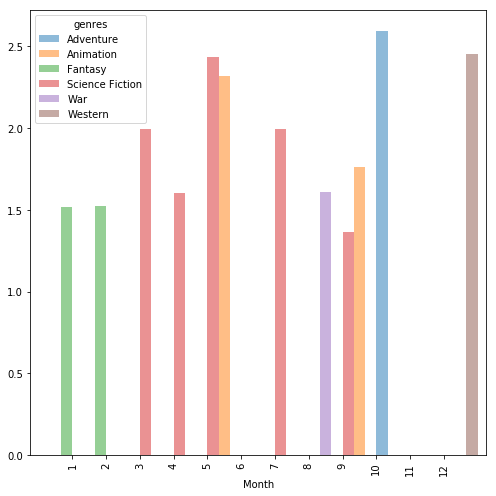

In [54]:
# Plot most popular genre for each month

df_g = df_g.groupby('Month').head(1)

fig, ax = plt.subplots(figsize=(7,7))

df_g.groupby(['Month','genres']).sum()['mean'].unstack().plot(kind='bar',ax=ax, width = 2, alpha = .5);

fig.tight_layout()

plt.show()

<a id='conclusions'></a>
## Conclusions

<br> I was able analyse the TMDB dataset and answer questions that I posed at the start of the lesson. 
<br> All the findings are based on this dataset alone and are hence provisional
<br> 
<br> 1. Does the budget of the movie determine its success (revenue collected)? 
<br> The budget with which the movie was made determines its success (in terms of revenue).
<br> Movies that were made on a larger budget collected more revenues and vice-versa.
<br> 
<br> 2. Was there a raise in popularity of the movies over the years? Did this raise help increase in revenues? 
<br> There was an uptick in the number of movies made and popularity of the movies over the years.
<br> Production houses made larger revenues due to increased # of movies.
<br>
<br> 3. When is the best time to release a movie? 
<br> By looking at average revenues made per month, we could deduce movies released during Summer and Holiday seasons made more revenues. 
<br> 
<br> 4. Which director should a production house approach to earn more revenues? 
<br> Looking at the average revenues collected by a movie that the director directed (taking number of movies also in to account), we were able to get the list of top performers. 
<br> This list is based on historical performance that a production can use for reference. 
<br> It cannot be used to measure future performance. 
<br>
<br> 5. Are movies of certain genre popular during certain months?
<br> We could see movies of different genre were popular during different month. But in general science fiction were the most popular followed by animation and fantasy.